In [194]:
#DATA importing and Cleaning
import pandas as pd
import os

#Opening and concatening the files for females and males folders
female = pd.DataFrame()
indir = '/Users/TarjaniAgrawal/Desktop/Springboard/Capstone I_data/Female data'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        x = pd.DataFrame.from_csv(indir + '/' + f, index_col= None, sep='\t')
        female = pd.concat([female, x], ignore_index=True)
male = pd.DataFrame()
male.tail()
indir = '/Users/TarjaniAgrawal/Desktop/Springboard/Capstone I_data/Male data'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        x = pd.DataFrame.from_csv(indir + '/' + f, index_col= None, sep='\t')
        male = pd.concat([male, x], ignore_index=True)
# Adding Sex column to female and male dataframes
import numpy as np
F = np.array('Female')
female['Sex']= F
M = np.array('Male')
male['Sex']= M
#Concatening male and female columns
df = pd.concat([female, male], ignore_index=True)
#Deleting NOTES column and CODES columns
df = df.drop(['Notes', 'State Code', 'Cancer Sites Code', 'Year Code', 'Age Group Code', 'Race Code'], axis=1)
#Deleting NaN rows
df = df[df.State.notnull()]  
#Checking different types of values in Deaths columns
#df['Deaths'].value_counts()
# Dropping rows with Deaths as Not applicable which mainly has rows for cancer site as female sex organ for males and vice versa
df = df[df['Deaths'] != 'Not Applicable']
# Looking at the different types of values in other columns in case they have any Nan
#cols = ['State', 'Cancer Sites', 'Year', 'Age Group', 'Race', 'Deaths', 'Population', 'Crude Rate', 'Sex']
#for col in cols:
    #x = df[col].value_counts()
    #print(x)

# Dropping the rows with Crude Rate or Population is equal to Not Applicable 
df = df[(df['Crude Rate'] != 'Not Applicable') | (df['Population'] != 'Not Applicable')]
# Taking dataframe without Suppressed values for now. 
df = df[(df['Deaths'] != 'Suppressed') | (df['Crude Rate'] != 'Suppressed')]
df.head()


,State,Cancer Sites,Year,Age Group,Race,Deaths,Population,Crude Rate,Sex
0,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,American Indian or Alaska Native,0,104,0.0,Female
1,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,Asian or Pacific Islander,0,245,0.0,Female
2,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,American Indian or Alaska Native,0,535,0.0,Female
3,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,Asian or Pacific Islander,0,1193,0.0,Female
4,Alabama,Oral Cavity and Pharynx,1999.0,5-9 years,American Indian or Alaska Native,0,874,0.0,Female


In [195]:
# Looking at the different types of values in other columns in case they have any Suppressed
#cols = ['State', 'Cancer Sites', 'Year', 'Age Group', 'Race', 'Deaths', 'Population', 'Crude Rate', 'Sex']
#for col in cols:
    #x = df[col].value_counts()
    #print(x)

In [196]:
# Looking at the data types of columns 
cols = ['State', 'Cancer Sites', 'Year', 'Age Group', 'Race', 'Deaths', 'Population', 'Crude Rate', 'Sex']
for col in cols:
    x = df[col].dtype
    print(col , x)

State object
Cancer Sites object
Year float64
Age Group object
Race object
Deaths object
Population object
Crude Rate object
Sex object


In [197]:
#Converting datatypes of Deaths, Population and Crude Rate
col_name = ['Deaths', 'Population', 'Crude Rate']
for col in col_name:
    df[col] = pd.to_numeric(df[col])
    t = df[col].dtype
    print(col , t)

Deaths int64
Population int64
Crude Rate float64


In [198]:
df.head()

,State,Cancer Sites,Year,Age Group,Race,Deaths,Population,Crude Rate,Sex
0,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,American Indian or Alaska Native,0,104,0.0,Female
1,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,Asian or Pacific Islander,0,245,0.0,Female
2,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,American Indian or Alaska Native,0,535,0.0,Female
3,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,Asian or Pacific Islander,0,1193,0.0,Female
4,Alabama,Oral Cavity and Pharynx,1999.0,5-9 years,American Indian or Alaska Native,0,874,0.0,Female


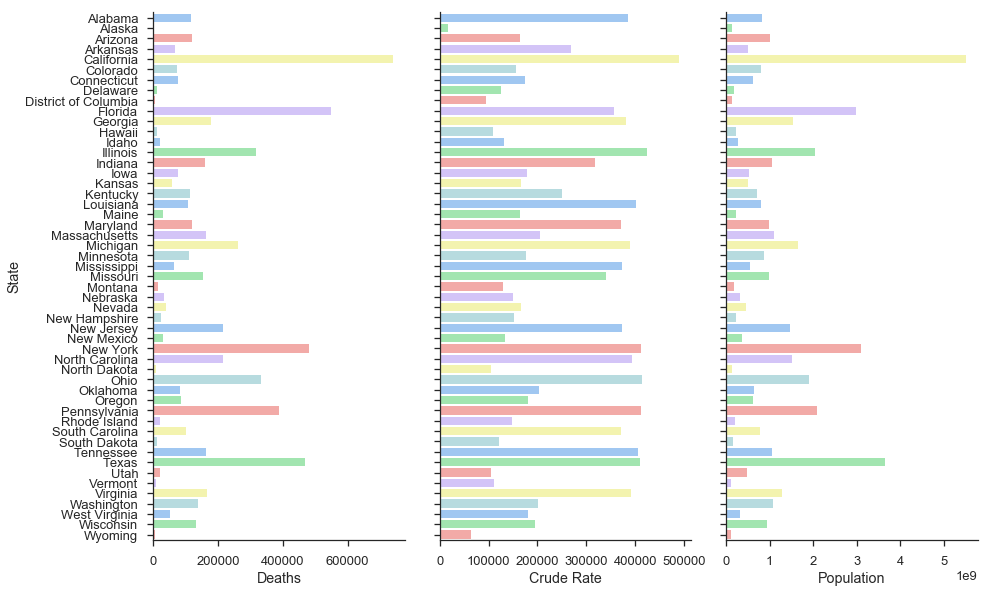

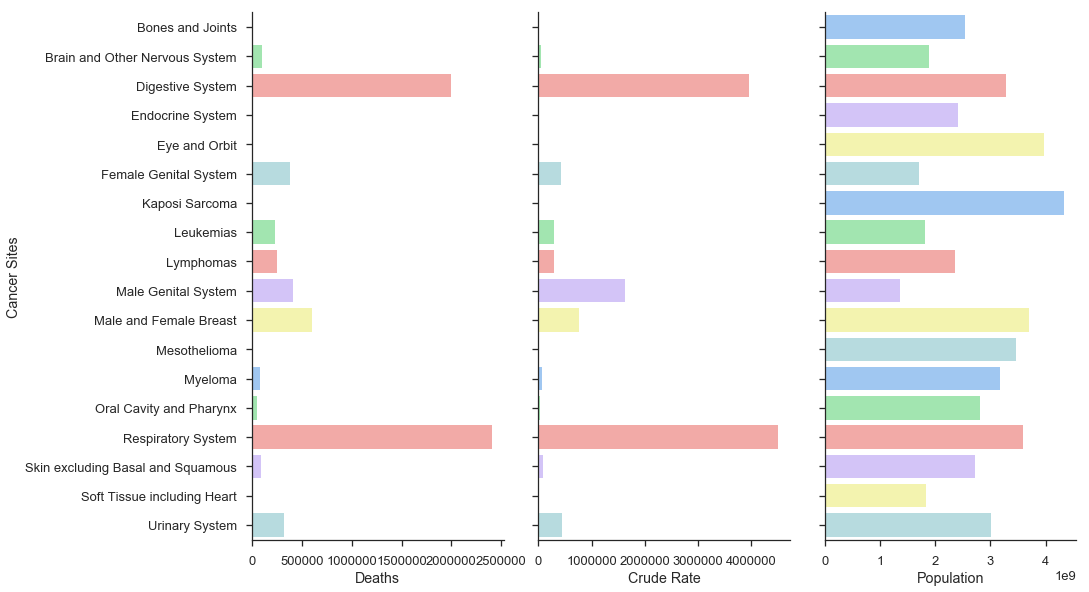

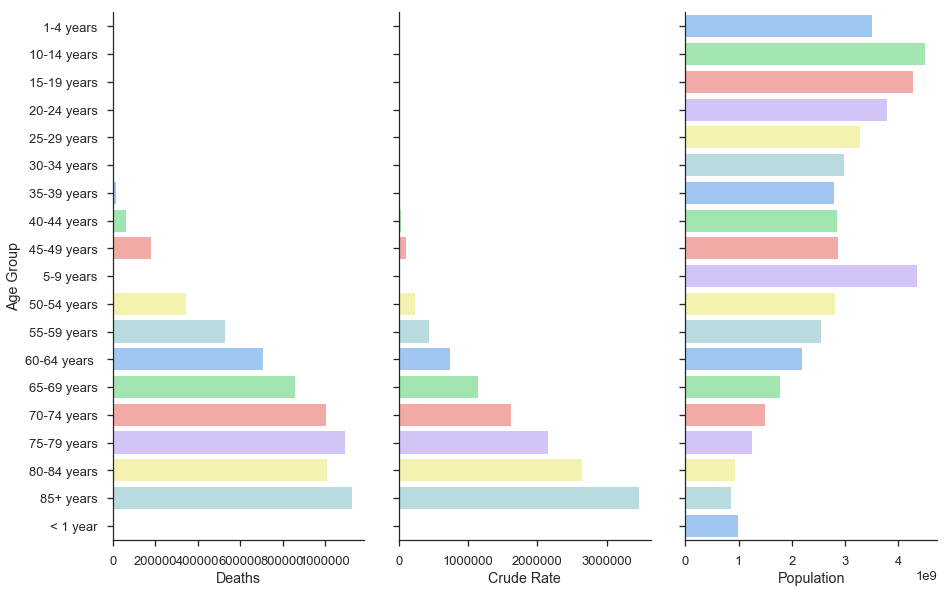

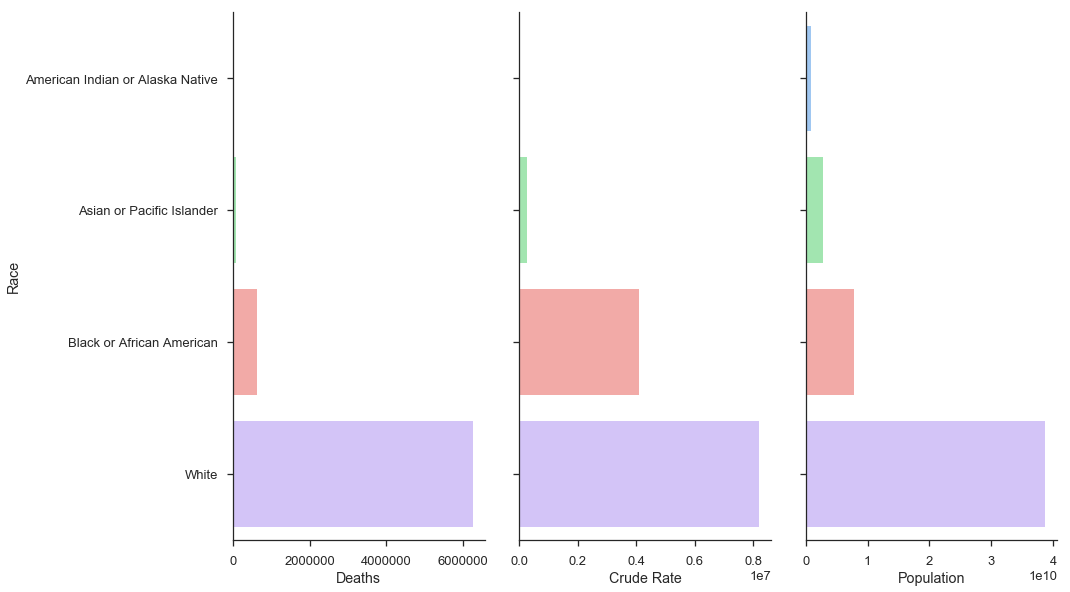

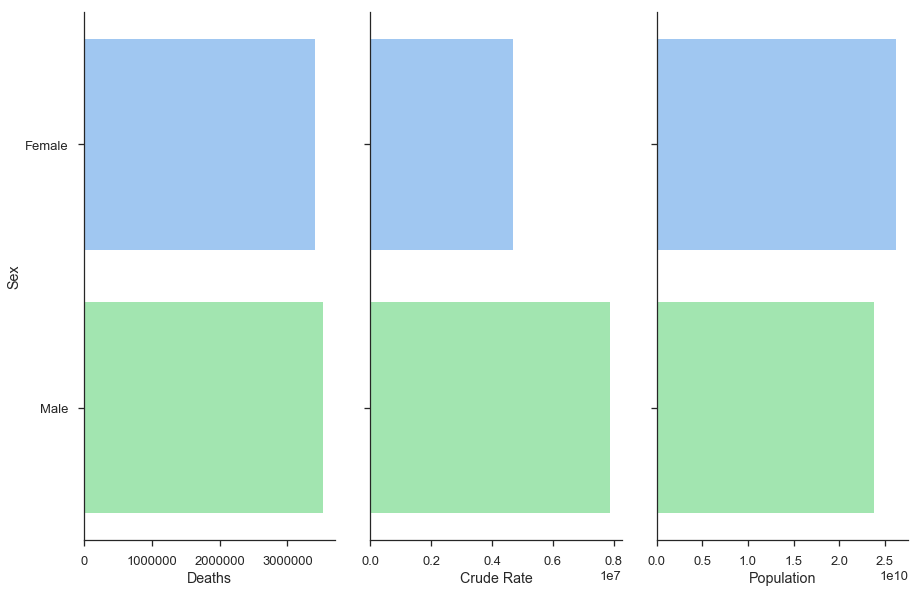

In [213]:
import seaborn as sns
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (16,9)})
sns.set_context('talk')
sns.set_style('ticks')


col_group = ['State','Cancer Sites', 'Age Group', 'Race', 'Sex']
for col in col_group:
    df_col = df.groupby([col]).sum().reset_index()
    g = sns.PairGrid(df_col, x_vars = ['Deaths', 'Crude Rate', 'Population'], y_vars= col, aspect = .5, size = 8.5)
    g.map(sns.barplot, palette='pastel')
    plt.show()    

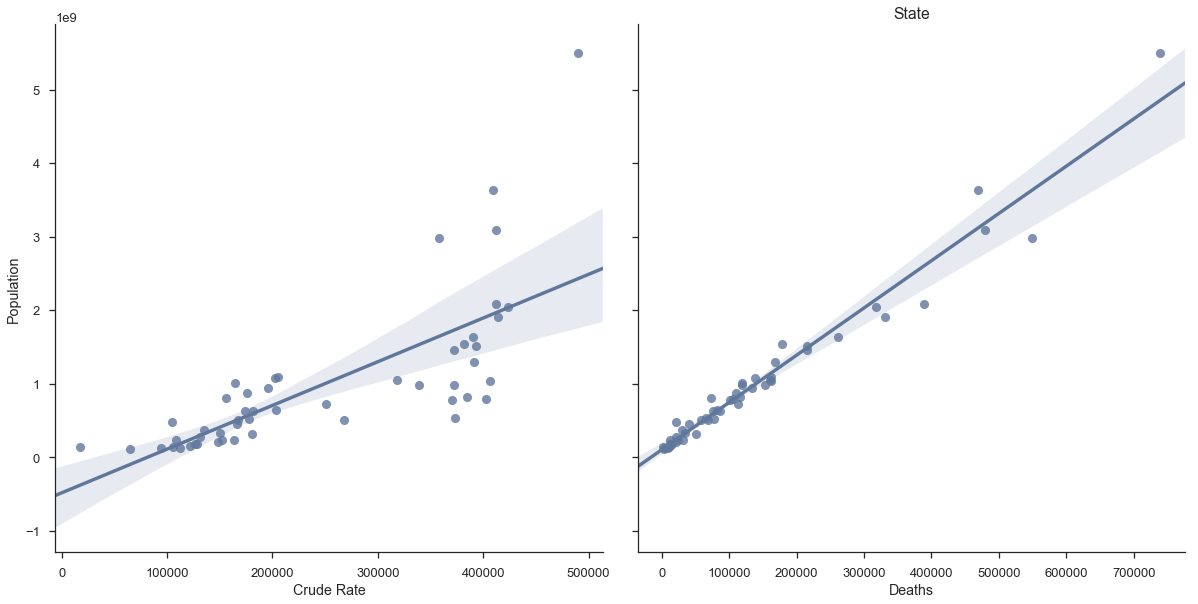

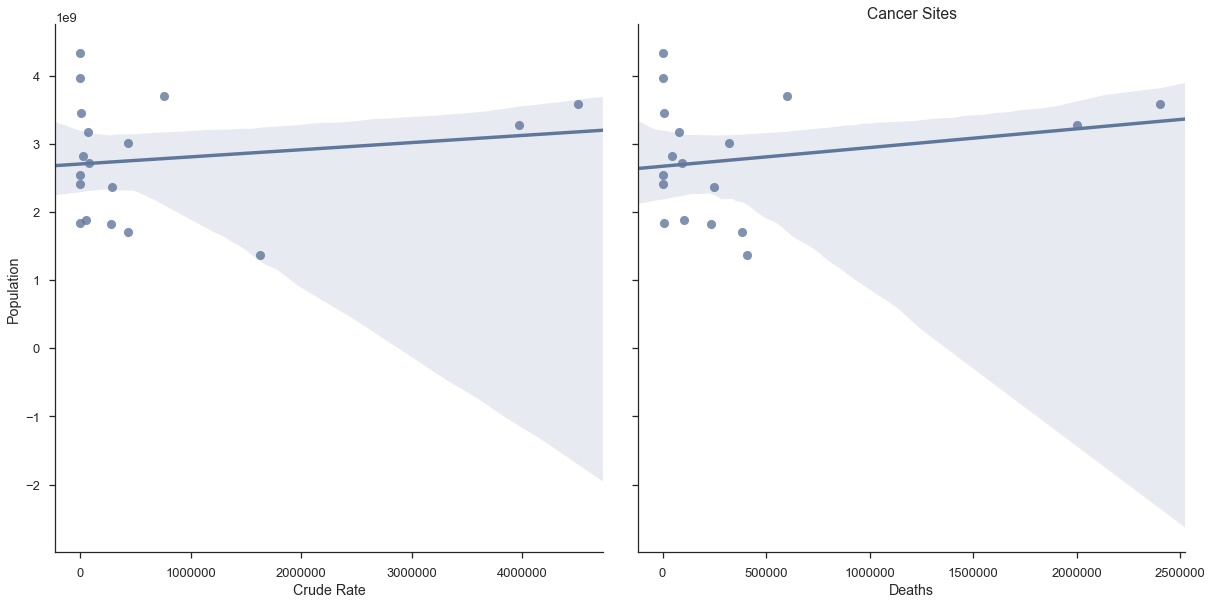

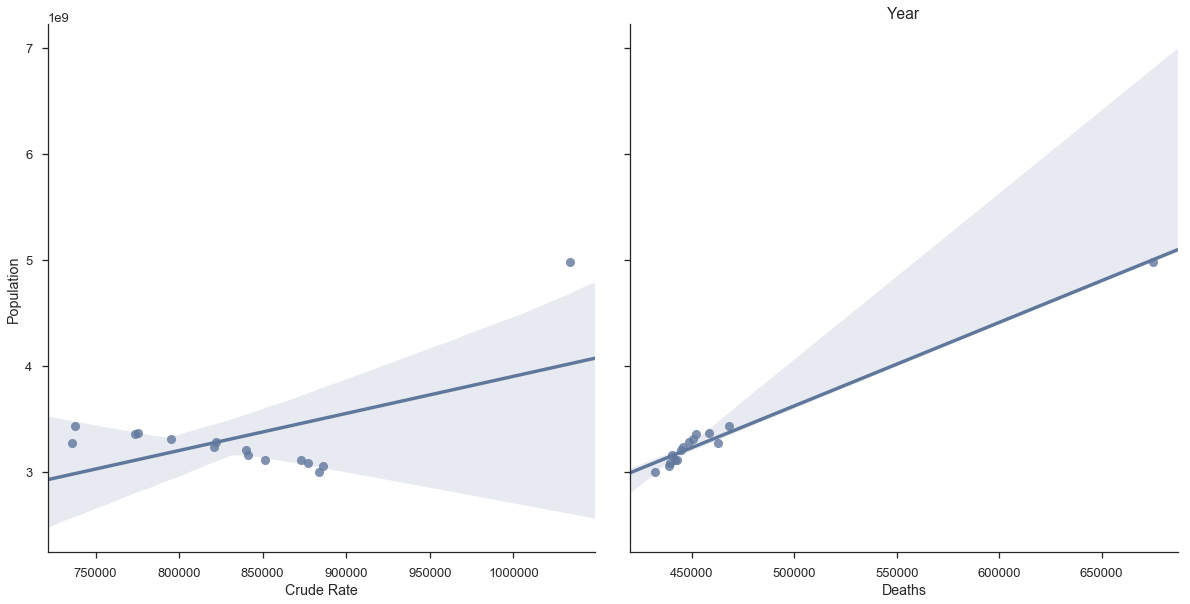

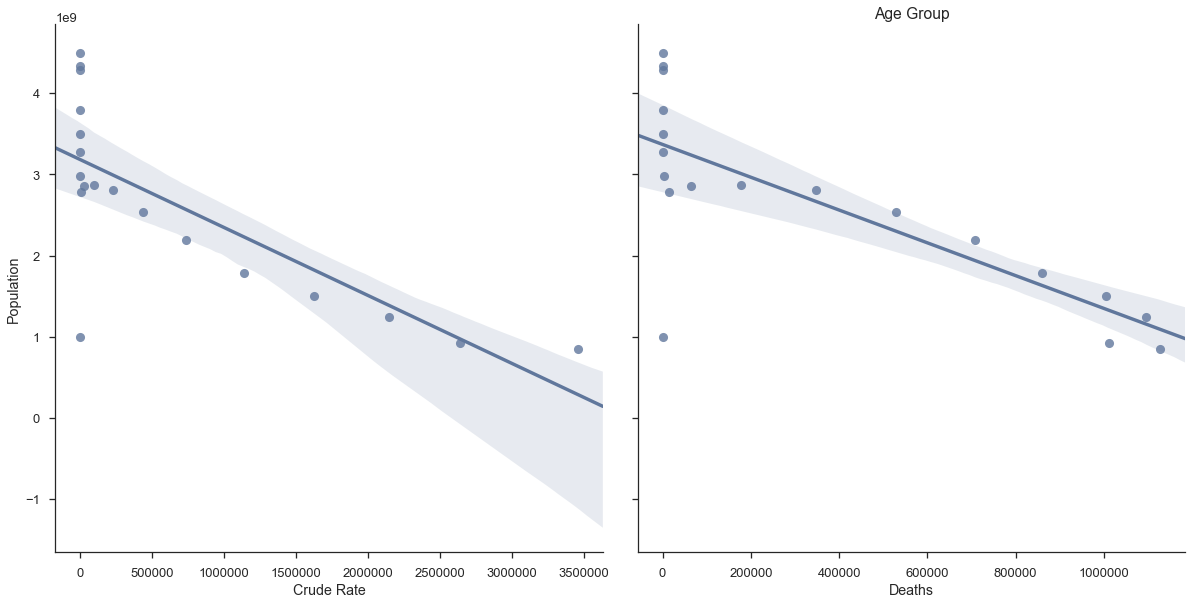

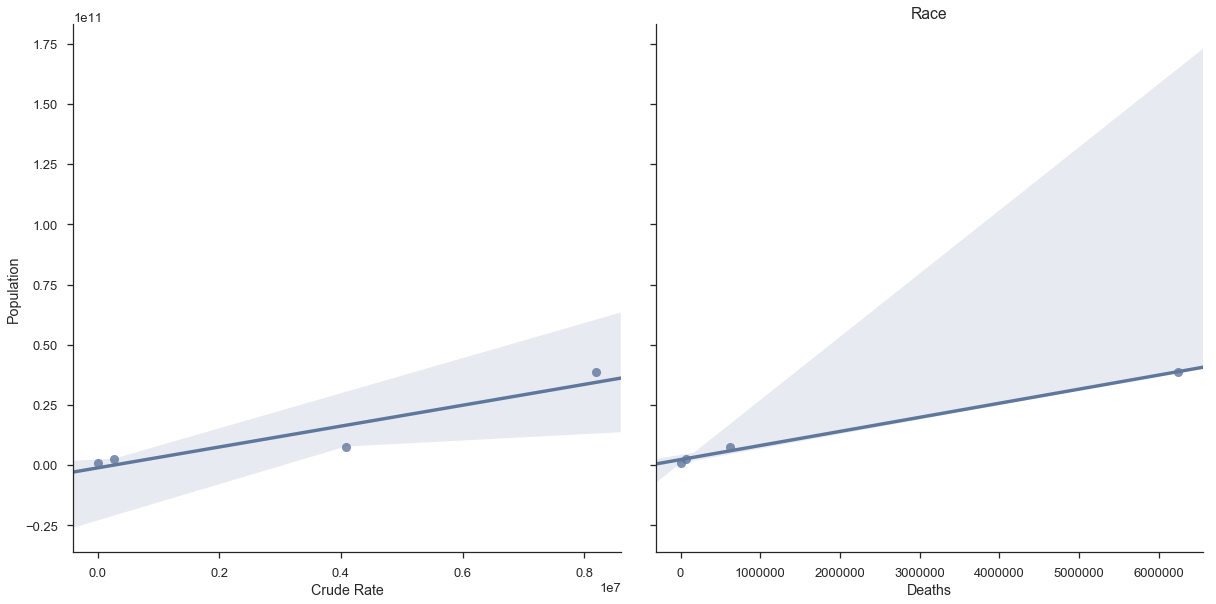

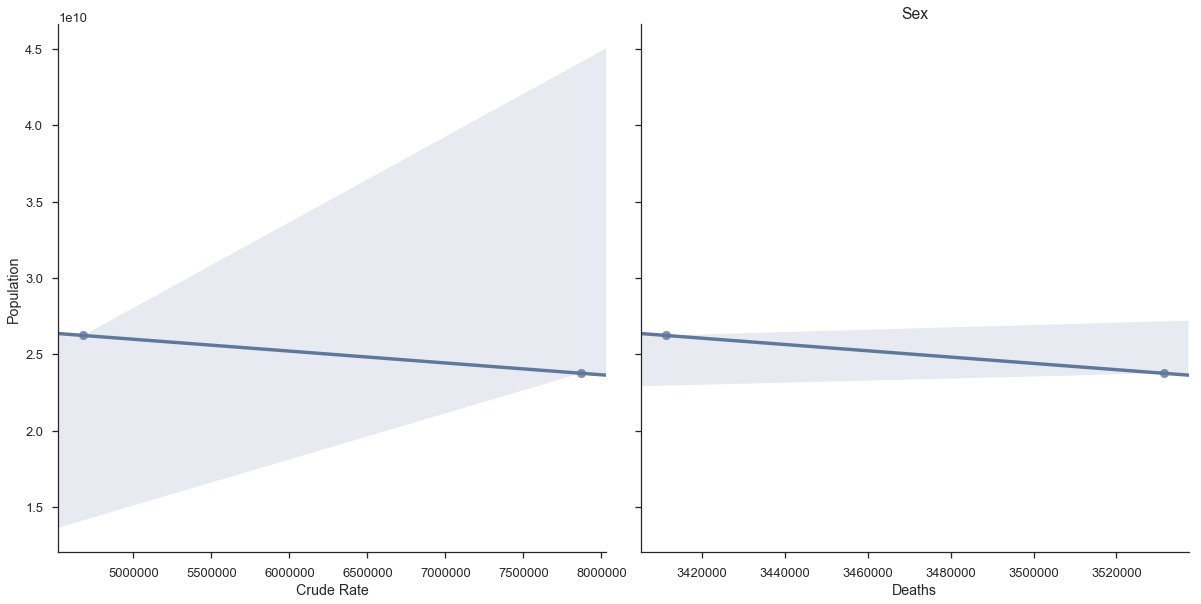

In [235]:
#Grouping it with just one factor and visualizing the relationship between deaths/Crude rate with population
col_group = ['State','Cancer Sites', 'Year', 'Age Group', 'Race', 'Sex']
for col in col_group:
    df_col = df.groupby([col]).sum().reset_index()
    g = sns.PairGrid(df_col, x_vars = ['Crude Rate','Deaths' ], y_vars= ['Population'] , aspect = 1, size = 8.5)
    g.map(sns.regplot)
    #sns.regplot(x='Population', y='Deaths', data= df_col)
    sns.plt.title(col)
    plt.show()

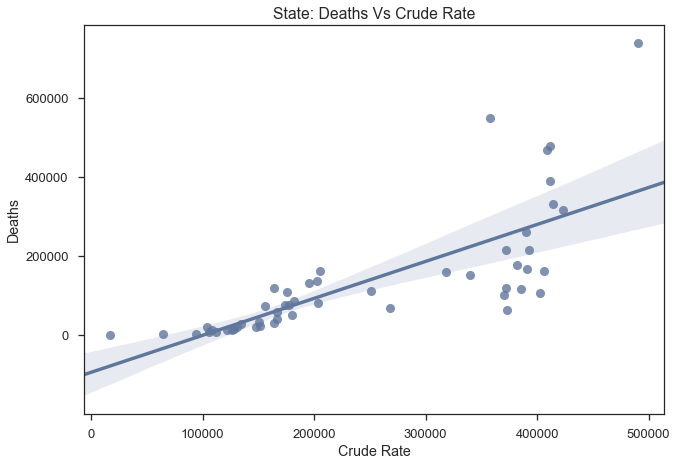

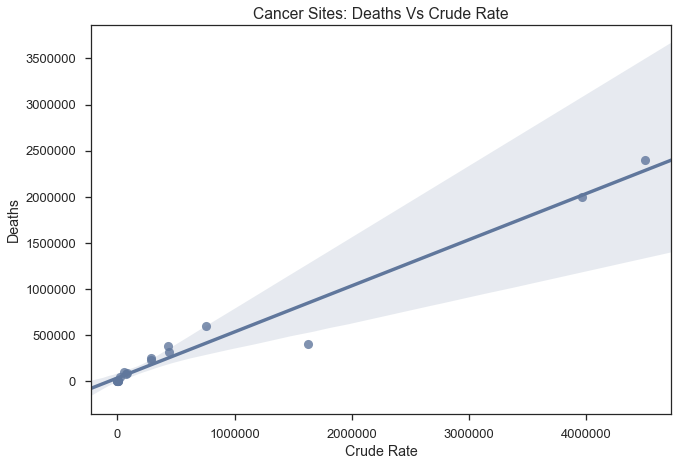

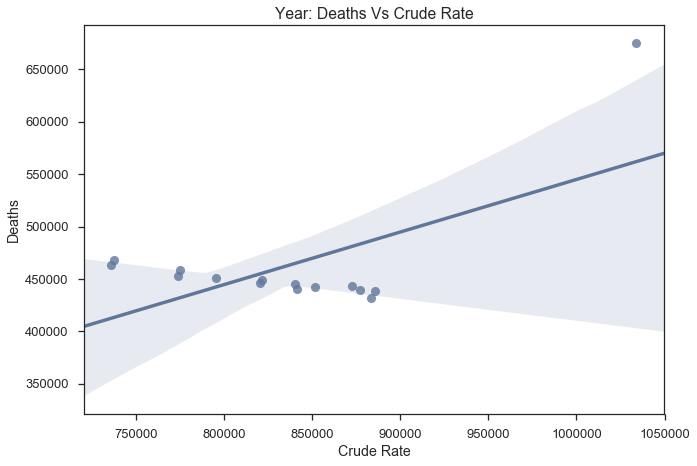

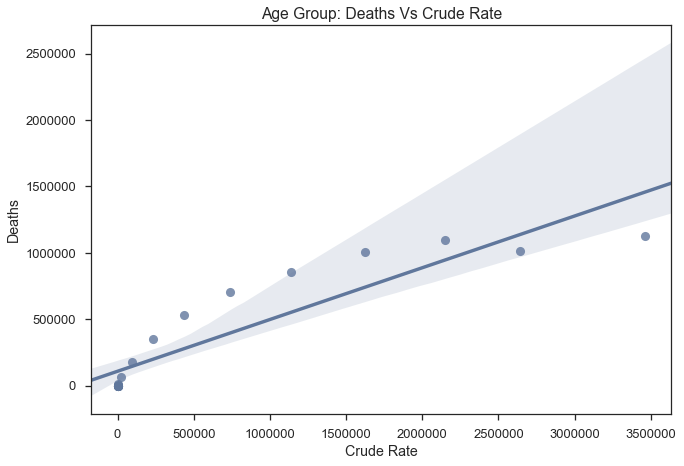

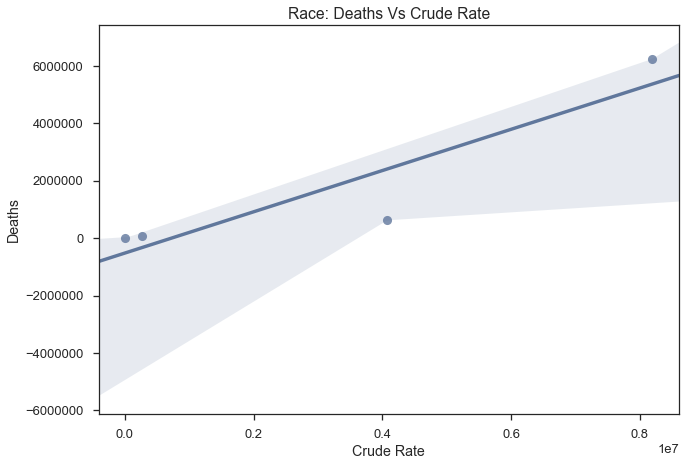

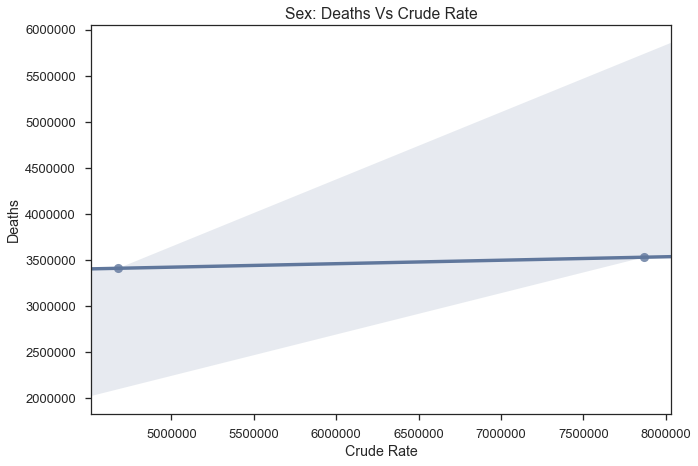

In [225]:
#Grouping it with just one factor and visualizing the relationship between deaths and Crude rate
col_group = ['State','Cancer Sites', 'Year', 'Age Group', 'Race', 'Sex']
for col in col_group:
    df_col = df.groupby([col]).sum().reset_index()
    sns.regplot(x='Crude Rate', y='Deaths', data= df_col)
    sns.plt.title(col + ': Deaths Vs Crude Rate')
    plt.show()
    

In [236]:
#Which States has maximum number of deaths
dfstate = df.groupby(['State']).sum().sort_values(by='Deaths', ascending = False)
dfstate = dfstate[dfstate['Deaths'] != 0].sort_values(by ='Deaths', ascending= False)
dfstate.head(20)

,Year,Deaths,Population,Crude Rate
State,,,,
California,51023828.0,739748,5491436275,489989.8
Florida,58033427.0,548797,2983295833,357659.8
New York,55163711.0,479464,3092101971,411962.5
Texas,55648452.0,469316,3639203553,409220.0
Pennsylvania,60154570.0,389165,2081085925,411945.1
Ohio,60712377.0,331423,1912840505,414057.0
Illinois,57893969.0,317566,2048562146,423626.8
Michigan,58780954.0,260926,1643476591,390154.5
New Jersey,58961624.0,215713,1458134718,372164.4


In [237]:
#Which cancer has maximum number of deaths 
dfcansit = df.groupby(['Cancer Sites']).sum()
dfcansit = dfcansit[dfcansit['Deaths'] != 0].sort_values(by ='Deaths', ascending= False).reset_index()
dfcansit.head(20)

,Cancer Sites,Year,Deaths,Population,Crude Rate
0,Respiratory System,185236565.0,2403563,3589242242,4504910.3
1,Digestive System,173921743.0,2000193,3274773145,3969652.1
2,Male and Female Breast,201064691.0,602713,3706302675,758842.5
3,Male Genital System,95891626.0,408275,1362521644,1630031.6
4,Female Genital System,89308560.0,382555,1699758176,432655.9
5,Urinary System,188307793.0,321244,3012140466,436774.2
6,Lymphomas,180809849.0,249719,2359732454,287900.7
7,Leukemias,171473869.0,233853,1818033699,284153.1
8,Brain and Other Nervous System,176113847.0,104718,1881478094,57401.3
9,Skin excluding Basal and Squamous,196495909.0,93413,2721756319,80781.1


In [238]:
#Which cancer has maximum number of deaths and in which state, in which year and which age group and what sex and race
df_grouped = df.groupby(['Cancer Sites','State', 'Year','Age Group', 'Sex', 'Race']).sum()
df_grouped = df_grouped[df_grouped['Deaths'] != 0].sort_values(by ='Deaths', ascending= False).reset_index()
df_grouped.head(20)

,Cancer Sites,State,Year,Age Group,Sex,Race,Deaths,Population,Crude Rate
0,Digestive System,California,2011.0,85+ years,Female,White,2580,675208,764.2
1,Digestive System,New York,2011.0,85+ years,Female,White,2004,468830,854.8
2,Digestive System,Florida,2011.0,85+ years,Female,White,1954,544348,718.0
3,Respiratory System,California,2011.0,85+ years,Female,White,1878,675208,556.2
4,Respiratory System,Florida,2011.0,85+ years,Female,White,1664,544348,611.4
5,Digestive System,Pennsylvania,2011.0,85+ years,Female,White,1622,401470,808.0
6,Respiratory System,California,2011.0,80-84 years,Female,White,1616,572492,564.6
7,Respiratory System,California,2011.0,75-79 years,Female,White,1554,674612,460.8
8,Respiratory System,California,2011.0,70-74 years,Female,White,1528,844226,362.0
9,Respiratory System,Florida,2011.0,70-74 years,Female,White,1506,751416,400.8


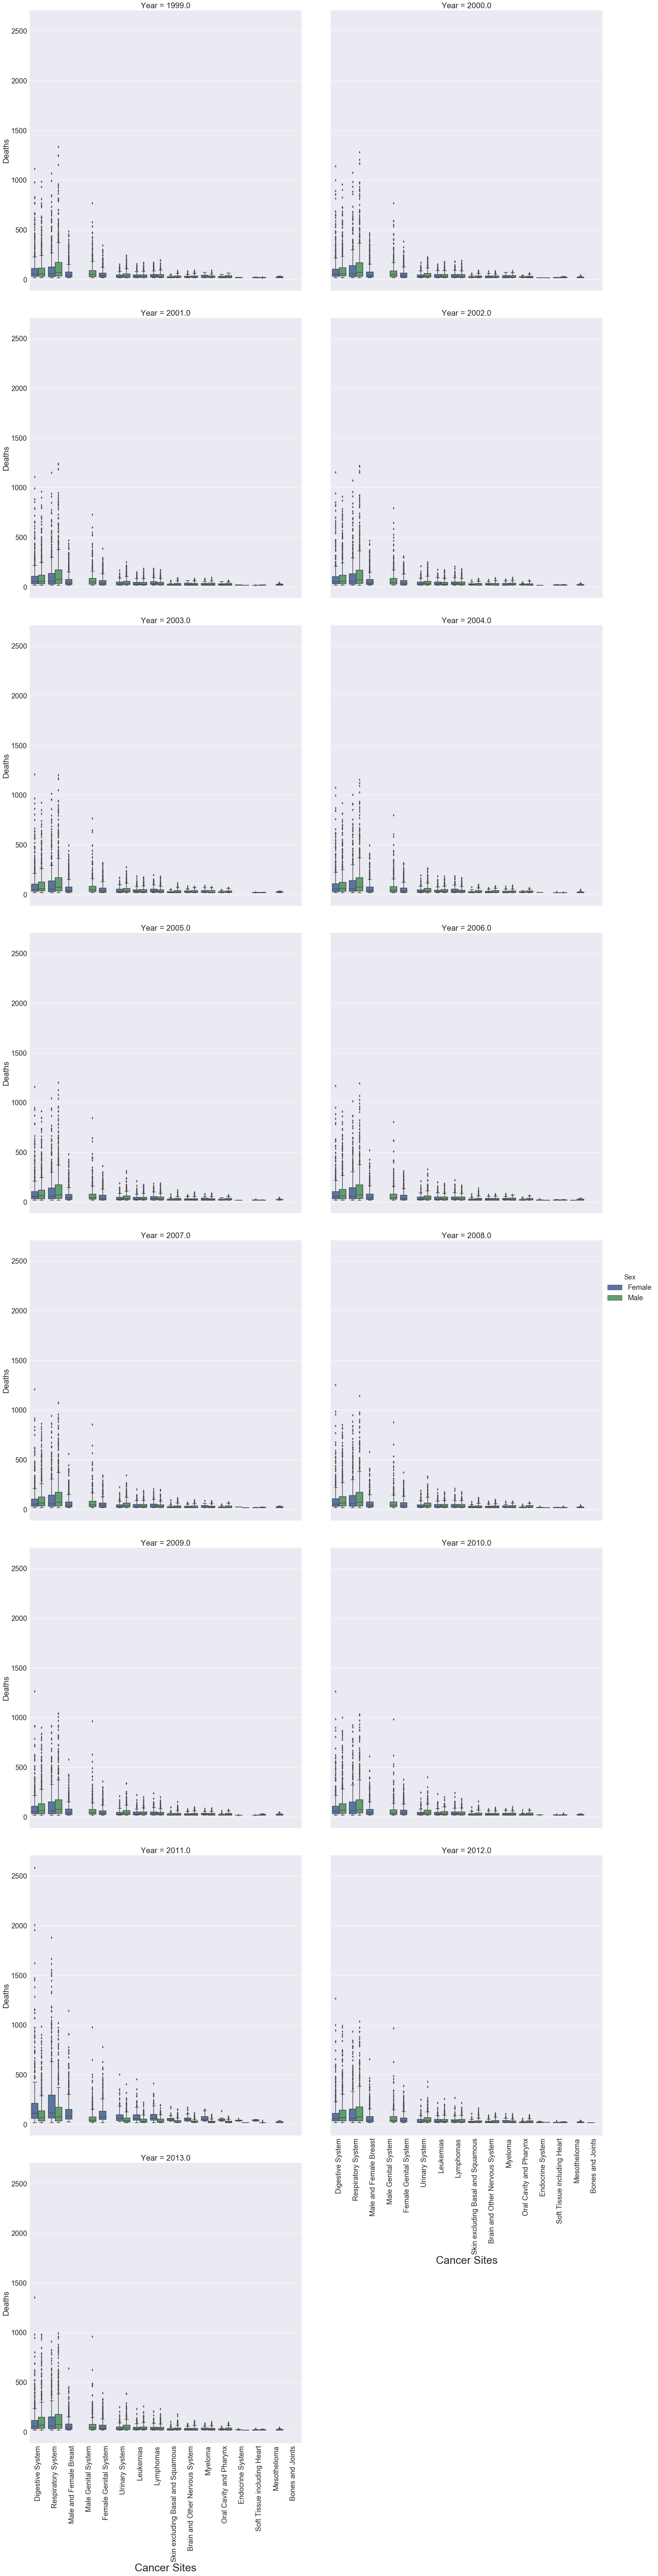

In [239]:
#Distribution of deaths due to cancer sites over the years
sns.set(font_scale=2)
p = sns.factorplot(x='Cancer Sites',y='Deaths', hue='Sex', col= 'Year',data= df_grouped, kind= 'box',col_wrap = 2 ,size= 12, aspect=1)
p.set_xticklabels(rotation=90)
p.set_xlabels(fontsize=30)
sns.plt.show()

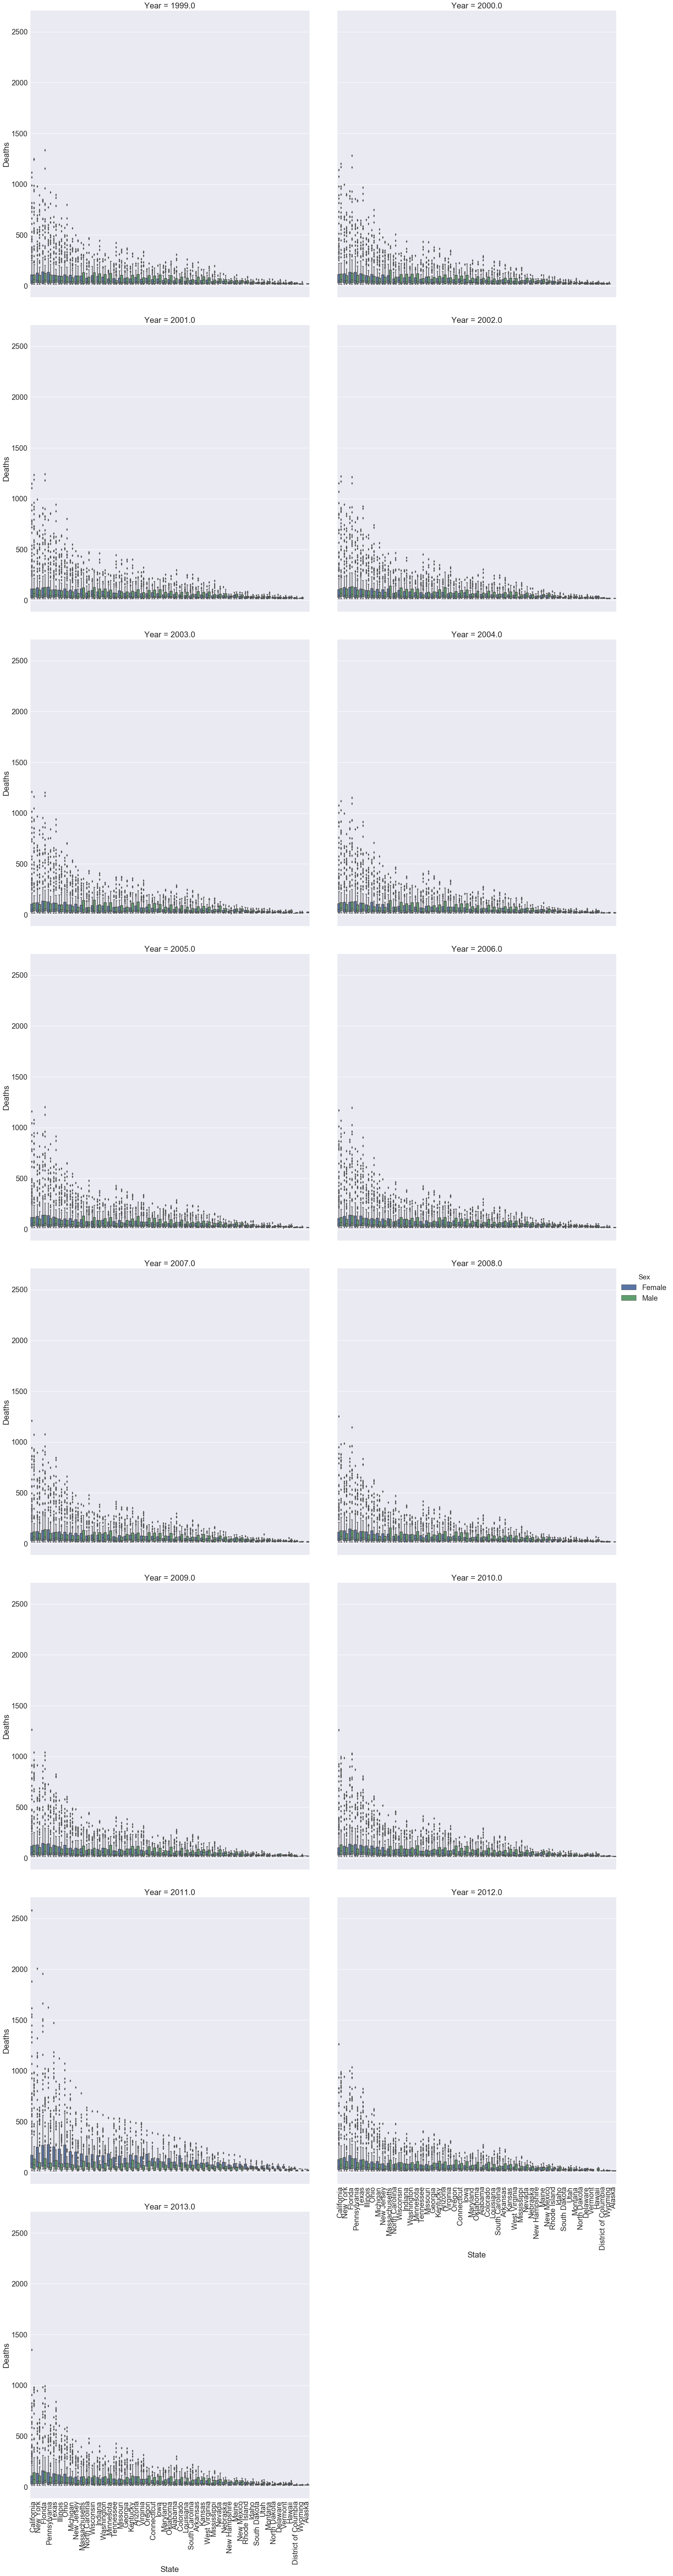

In [240]:
#Distribution of deaths due to States over the years
sns.set(font_scale=2)
p = sns.factorplot(x='State',y='Deaths', hue='Sex', col= 'Year',data= df_grouped, kind= 'box',col_wrap = 2 ,size= 12, aspect=1)
p.set_xticklabels(rotation=90)
plt.show()

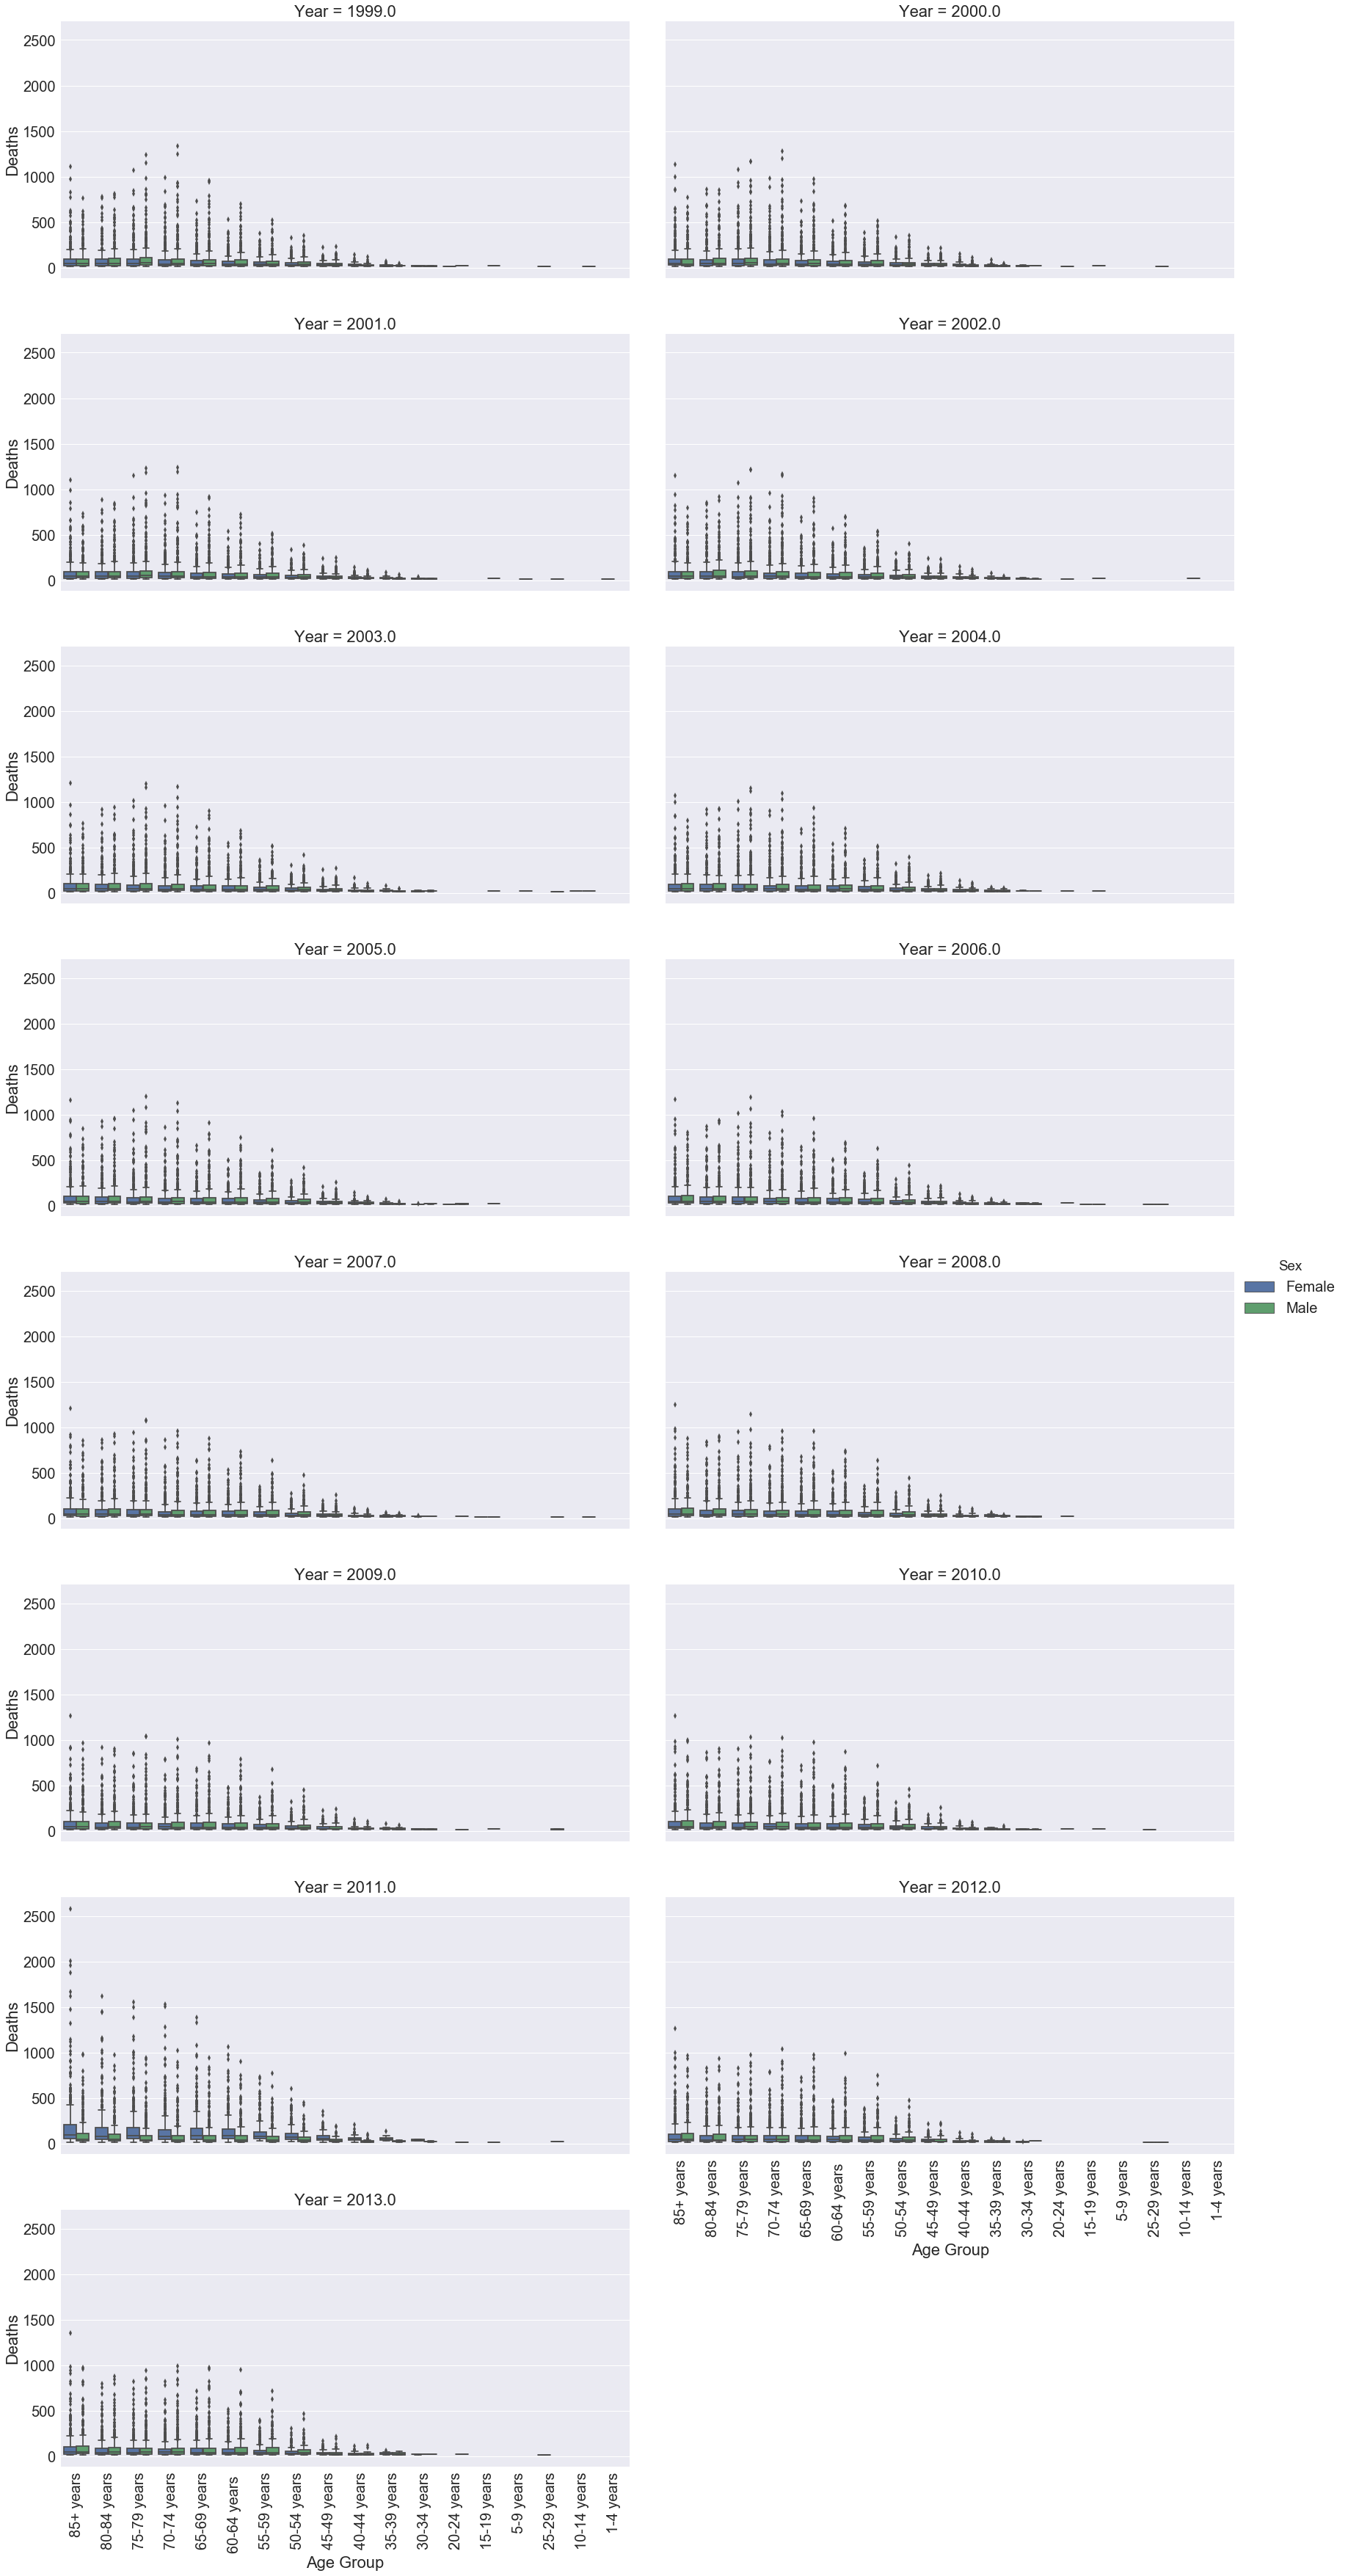

In [241]:
#Distribution of deaths due to Age Group over the years
p1 = sns.factorplot(x='Age Group',y='Deaths', hue='Sex', col= 'Year',data= df_grouped, kind= 'box',col_wrap = 2 ,size= 6, aspect=2)
p1.set_xticklabels(rotation=90)
plt.show()

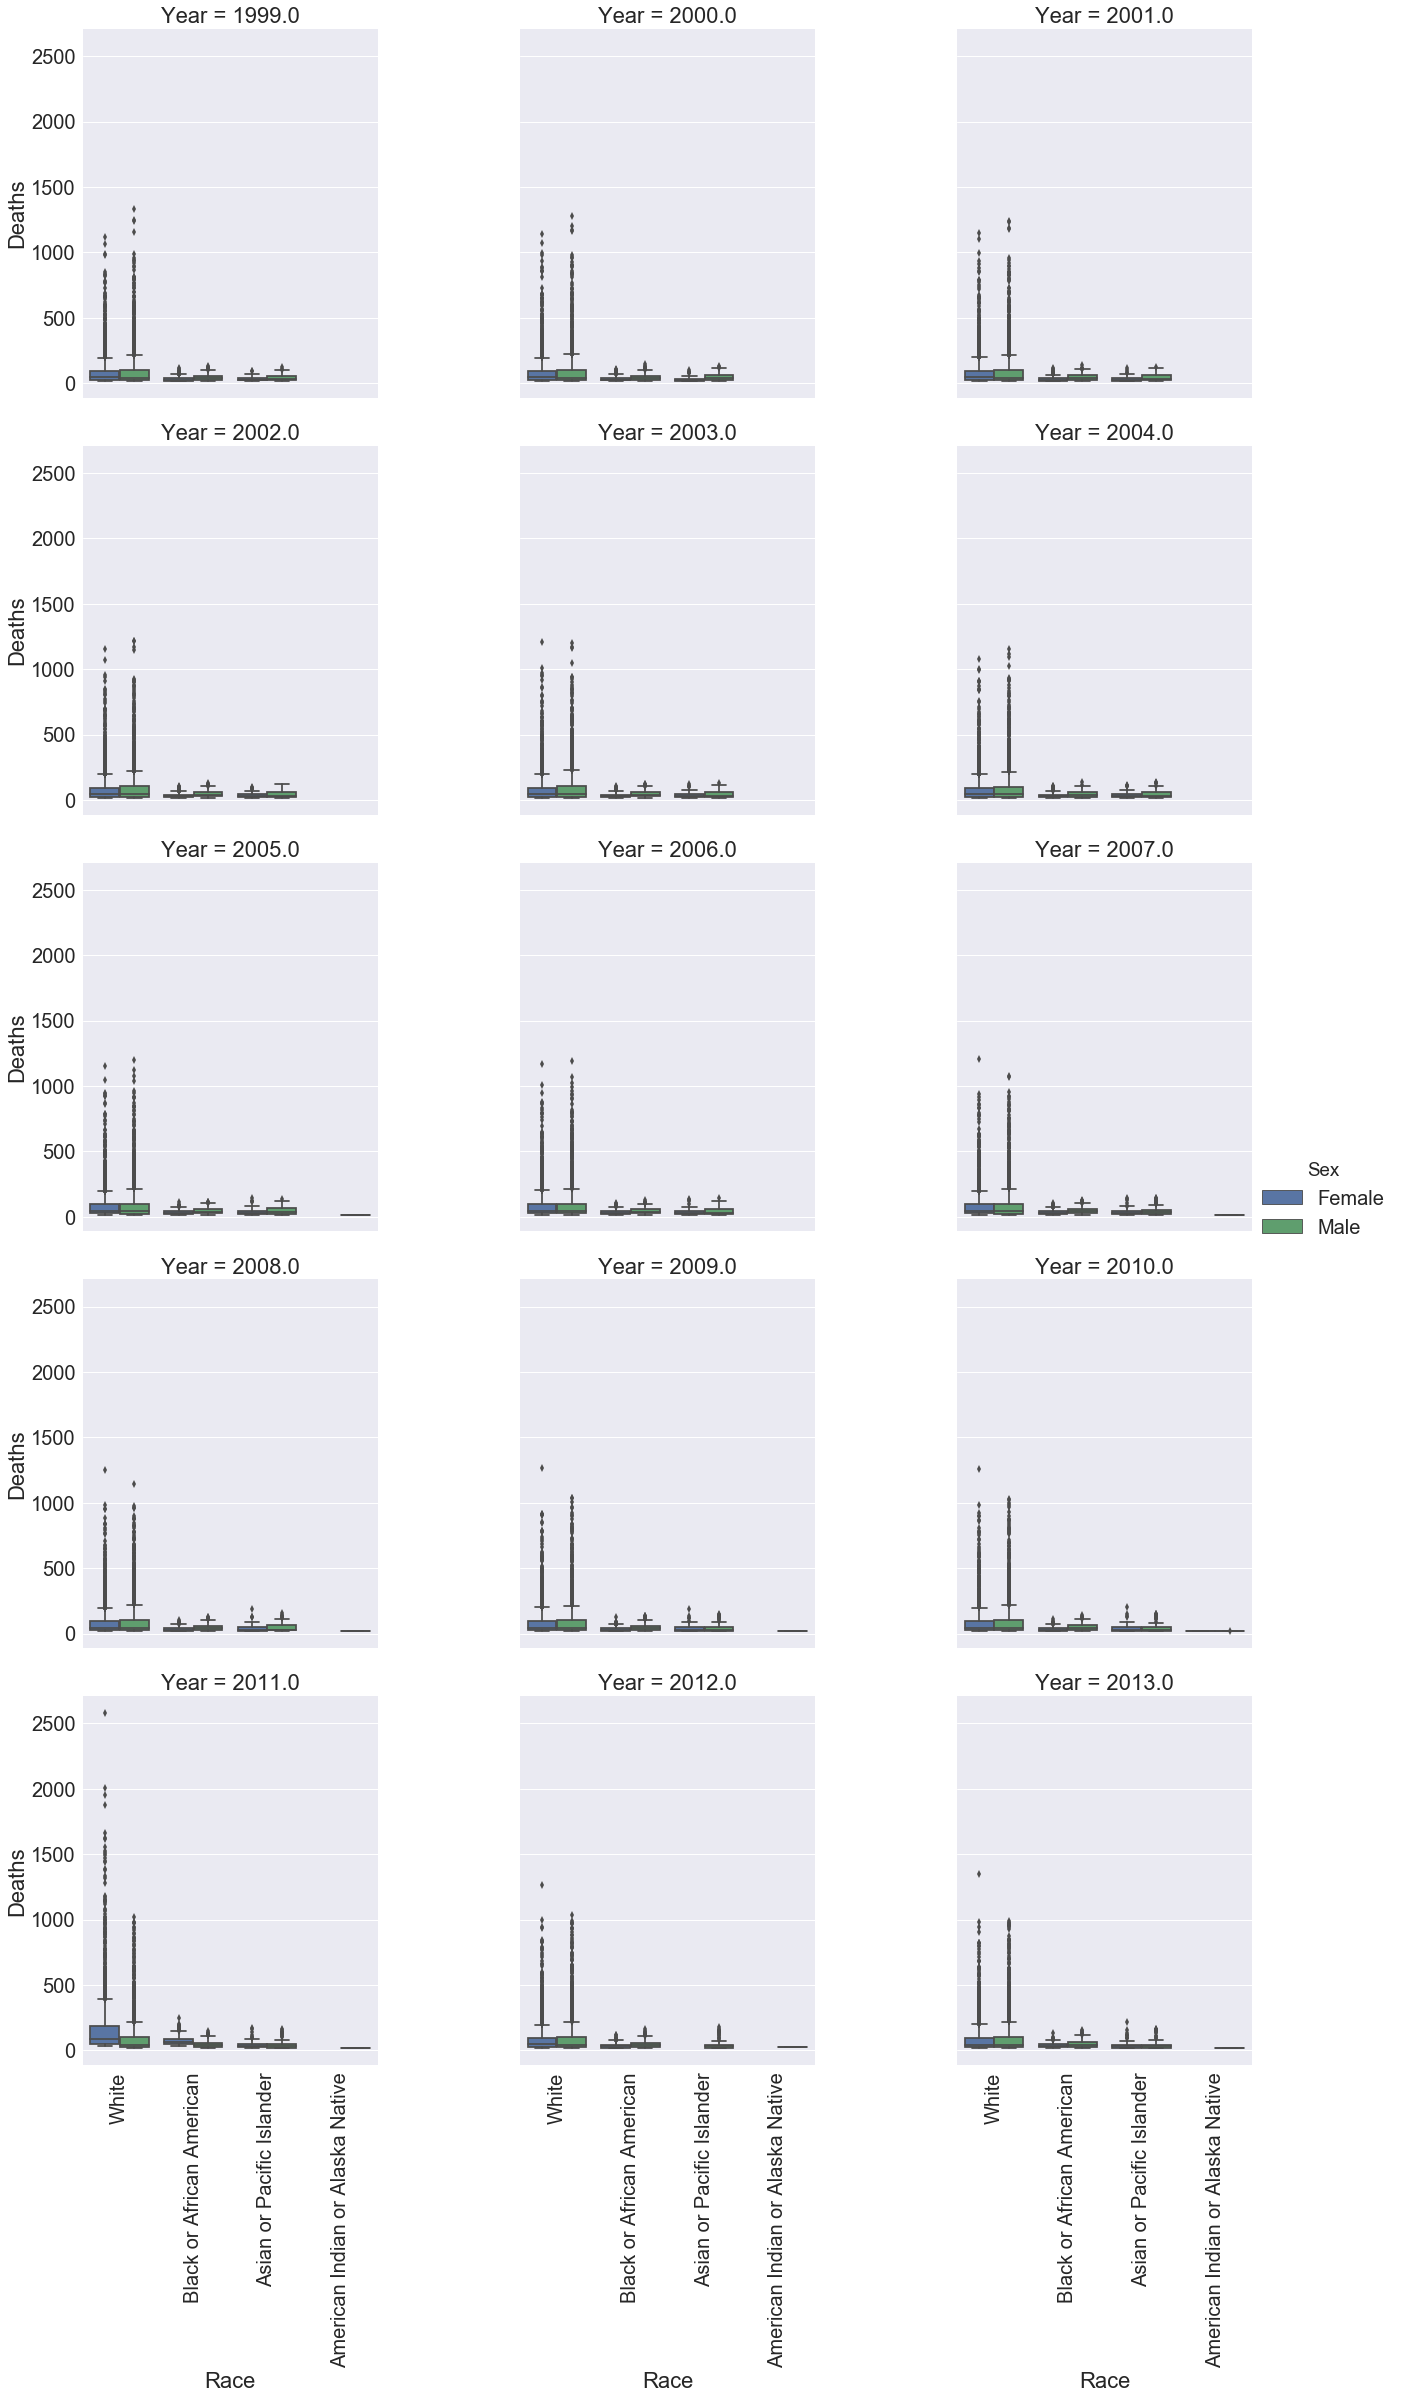

In [242]:
#Distribution of deaths due to Race over the years
p = sns.factorplot(x='Race',y='Deaths', hue='Sex', col= 'Year',data= df_grouped, kind= 'box',col_wrap = 3 ,size= 6, aspect=1)
p.set_xticklabels(rotation=90)
plt.show()

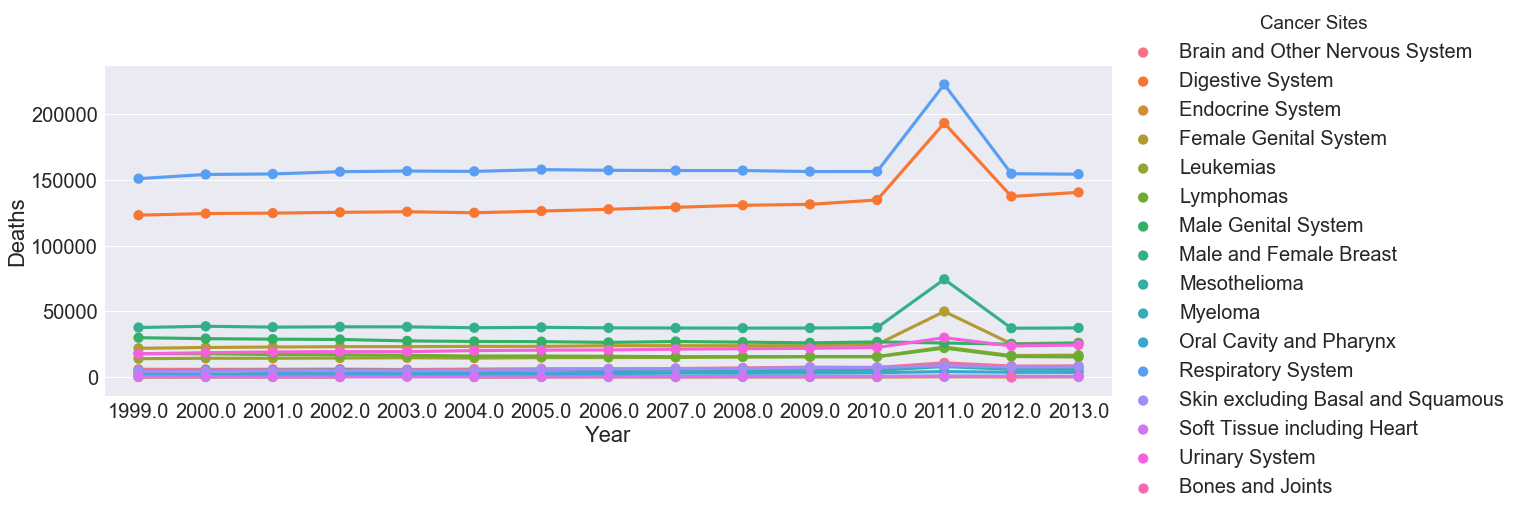

In [278]:
#How does the number of deaths change over time for each cancer site
dfyearcan = df.groupby(['Year', 'Cancer Sites']).sum()
dfyearcan = dfyearcan[dfyearcan['Deaths'] != 0].reset_index()
dfyearcan.head(20)

g = sns.factorplot(x="Year", y="Deaths", hue="Cancer Sites", data=dfyearcan,
                 palette="husl", size=6, aspect=2.75)
g.despine(left=True)
plt.show()

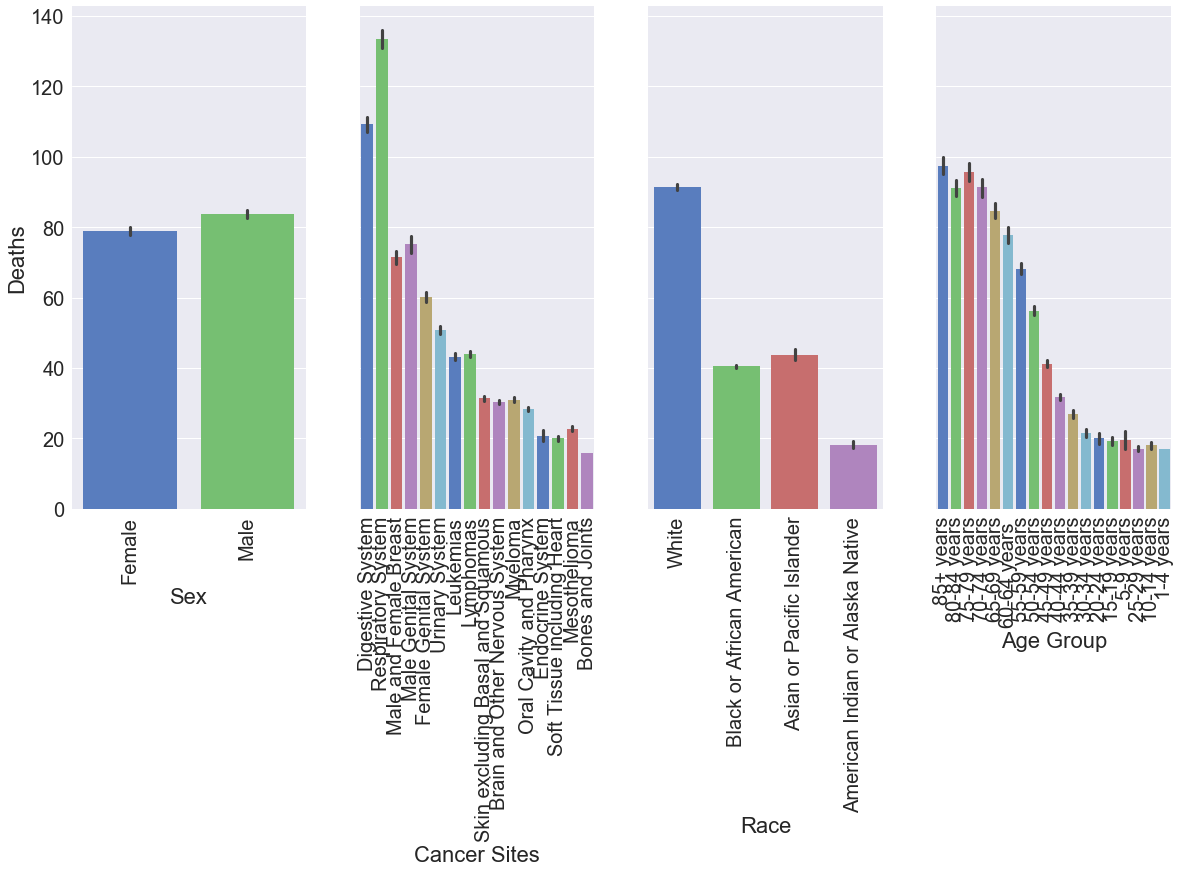

In [279]:
#Distribution of Deaths for Sex, Cancer Sites, Race, Age Group
g = sns.PairGrid(df_grouped, x_vars = ['Sex', 'Cancer Sites', 'Race', 'Age Group'], y_vars= 'Deaths', aspect = .5, size = 8.5)
g.map(sns.barplot, palette='muted')
for ax in g.axes.flatten(): 
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=90)
        #plt.xticks(rotation =90)
plt.show()